<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/StellarPopClustersLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis on Stellar Clusters

Abbiamo dei dati sul color magnitude di un insieme di stelle, che ci dà un insieme di dati sulla luminosità e il colore di una stella (B-V, sottrazione di due bande di colori diversi). 

In [ ]:
#Importazioni iniziali da fare per il nostro lavoro

import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster


In [ ]:
cmag = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS_FBianco/main/clustering/colormag_NGC2808.csv", header=None)
cmag

,0,1
0,-0.286449,19.920797
1,-0.273440,20.197264
2,-0.270112,19.915151
3,-0.243489,20.285819
4,-0.213538,19.689023
...,...,...
596,1.540265,17.014947
597,1.540265,18.009830
598,1.540265,19.012137
599,1.540265,20.007020


In [ ]:
#ci sono missing values?
#NO! Il count mi dà 601 e 601 su entrambe le colonne, a posto!
cmag.describe()

,0,1
count,601.000000,601.000000
mean,0.657683,18.751932
std,0.410194,1.320065
min,-0.286449,15.017758
25%,0.485623,17.930904
50%,0.753550,18.925512
75%,0.911292,19.911214
max,1.540265,21.016941


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 500x500 with 0 Axes>

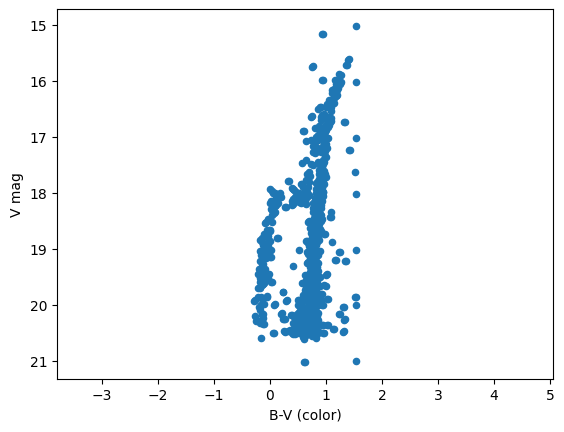

In [ ]:
#Visualizziamo i dati!
pl.figure(figsize=(5,5))
ax= cmag.plot(x=0,y=1, kind="scatter")
ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
#problema! Le mie variabili nel feature space non sono sulla stessa scala!
#meglio metterli su stessa scala
ax.axis("equal")

pl.gca().invert_yaxis();

In [ ]:
#c'è un'evidente correlazione tra le variabili! quindi devo fare preprocessing
cmag_scaled = preprocessing.scale(cmag, axis=0)

In [ ]:
#sono corretti? Hanno media uguale a zero?
preprocessing.scale(cmag, axis=0).mean(axis=0)

array([-9.45813958e-17, -1.84433722e-15])

In [ ]:
#hanno varianza uguale a uno?
preprocessing.scale(cmag, axis=0).std(axis=0)

array([1., 1.])

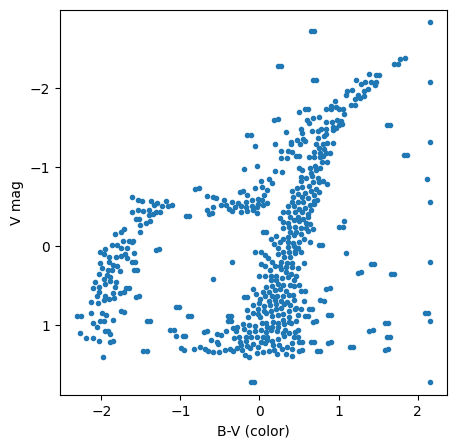

In [ ]:
#OK! Ho verificato che vanno bene. Ora li plotto:

#Visualizziamo i dati!
ax = pl.figure(figsize=(5,5)).add_subplot(111)
ax.plot(cmag_scaled[:,0],cmag_scaled[:,1],'.')
ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
#problema! Le mie variabili nel feature space non sono sulla stessa scala!
#meglio metterli su stessa scala
ax.axis("equal")

pl.gca().invert_yaxis();

In [ ]:
#Scalate le variabili con un opportuno atto di preprocessing, ora posso
#utilizzare le funzioni di clustering

#vediamo come funziona KMeans
cluster.KMeans?

#Questo algoritmo viene fatto iterare più volte,
#fino a che non si ha convergenza

In [ ]:
#comincio con 3 clusters
#creo il modello. Non ho bisogno di passare dei dati al modello

model=cluster.KMeans(n_clusters=3, random_state=102)

In [ ]:
#gli butto dentro i dati
model.fit(cmag_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=102)

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [ ]:
#vediamo quali sono i centri dei clusters
model.cluster_centers_

array([[ 0.62251398, -1.09094667],
       [-1.61167123,  0.31291912],
       [ 0.2930383 ,  0.77187379]])

In [ ]:
#quante iterazioni ho dovuto fare?
model.inertia_


336.09752492000223

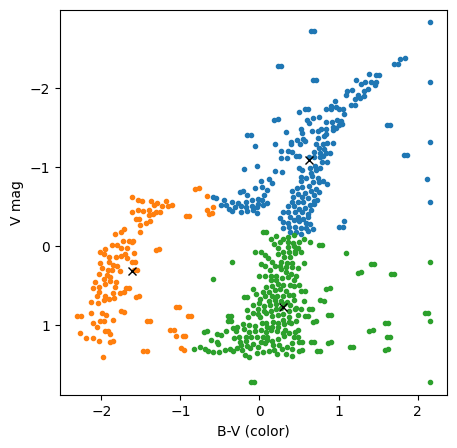

In [ ]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
#opzione per plottare i dati sui tre clusters, con i=1,2,3
for i in range(3): 
  #plotting dei cluster con diversi colori
  ax.plot(cmag_scaled[model.labels_==i,0], cmag_scaled[model.labels_==i,1], '.')
  #plotting dei centri dei diversi clusters, che indichiamo con una X nera
  ax.plot(model.cluster_centers_[i,0], model.cluster_centers_[i,1], 'kx')

#labels del mio plot
ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

#inverto l'asse y essendo delle magnitudini
pl.gca().invert_yaxis();

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 0, 'n clusters')

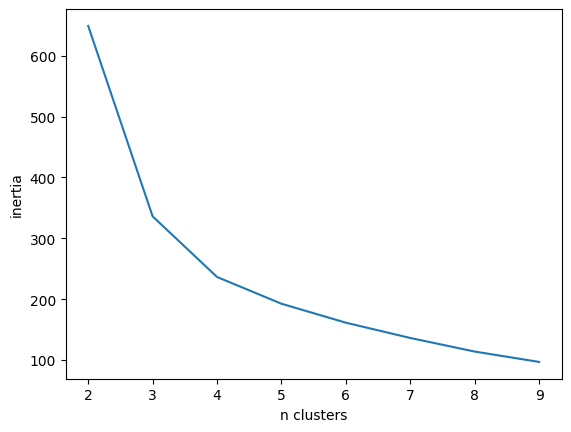

In [ ]:
#è sensato questo tipo di clustering? Oppure esiste un più intelligente insieme
#di clustering in 3 gruppi? Sì, esiste! KMeans non lo può fare però, perché
#KMeans si basa solo sulla distanza bidimensionale! Ma allora i cluster che si
#trovano con KMeans saranno tutti clusters basati sulla distanza, e quindi sui
#blobs sferici, e non riconosce dei vuoti all'interno del nostro feature space.

#Un altro algoritmo sarebbe quello di non calcolare solo la distanza rispetto al
#centro, ma anche la distanza tra i punti a due a due, per costruire un algoritmo
#di clustering affinity based (ma ci dà una distanza d^2, probematica in termini
#di costo computazionale)

#esiste un algoritmo che mi sceglie lui quale sia il numero di centri adeguati?
#Sì, si basa sull'inertia

inertias = []
for nc in range(2, 10):
  model = cluster.KMeans(n_clusters=nc, random_state=302).fit(cmag_scaled)
  inertias.append(model.inertia_)

pl.plot(range(2,10), inertias)
pl.ylabel("inertia")
pl.xlabel("n clusters")


#più l'inertia è bassa, più il numero di clusters è ok!

In [ ]:
#introduciamo il model DB SCAN

#i parametri standard sono:
#epsilon=0.5 (mezza std)
#n_points_for_cluster=5

#ci butto dentro i dati con fit

modeldbs = cluster.DBSCAN().fit(cmag_scaled)

In [ ]:
modeldbs.labels_


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

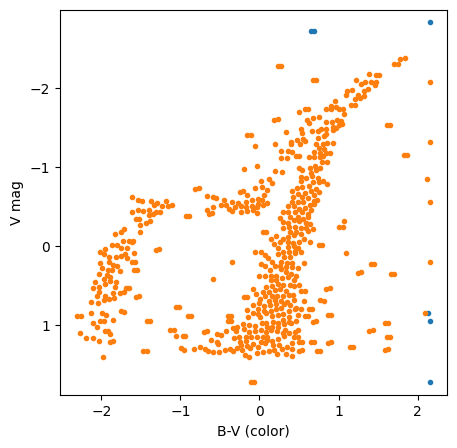

In [ ]:
# per ogni label che ho scelto, plotta i dati che ho scelto

ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in  np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis();

In [ ]:
#whoops! Ho trovato un solo cluster! Questo perché la mia definizione di clustering è
#molto poco restrittiva e generosa. Se uso un epsilon troppo piccolo viceversa
#trovo tutti outliers

#se volessi accanirmi ad utilizzare DBSCAN, dovrei trovare quale epsilon buona
#utilizzare! Per farlo, vediamo per quali epsilon ho diversi numeri di cluster

#Sto facendo un hyperparameter greed search!

for e in np.arange(0.001, 1, 0.001):
  modeldbs = cluster.DBSCAN(eps=e, min_samples=10).fit(cmag_scaled)
  #ora se il massimo numero di label è > 0, ossia se ho almeno due cluster,
  #allora stampami il numero di cluster
  if modeldbs.labels_.max() > 0:
    print(e, modeldbs.labels_.max())


0.109 1
0.11 1
0.111 1
0.112 2
0.113 3
0.114 3
0.115 3
0.116 6
0.117 8
0.11800000000000001 10
0.11900000000000001 11
0.12000000000000001 12
0.121 12
0.122 12
0.123 13
0.124 13
0.125 9
0.126 6
0.127 6
0.128 7
0.129 7
0.13 6
0.131 6
0.132 5
0.133 5
0.134 5
0.135 5
0.136 5
0.137 5
0.138 4
0.139 3
0.14 3
0.14100000000000001 3
0.14200000000000002 4
0.14300000000000002 4
0.14400000000000002 4
0.14500000000000002 4
0.146 5
0.147 6
0.148 6
0.149 6
0.15 6
0.151 6
0.152 5
0.153 6
0.154 6
0.155 6
0.156 6
0.157 6
0.158 6
0.159 7
0.16 7
0.161 7
0.162 7
0.163 7
0.164 7
0.165 7
0.166 7
0.167 7
0.168 7
0.169 6
0.17 6
0.171 6
0.17200000000000001 6
0.17300000000000001 6
0.17400000000000002 5
0.17500000000000002 5
0.17600000000000002 5
0.177 5
0.178 5
0.179 4
0.18 4
0.181 4
0.182 4
0.183 4
0.184 4
0.185 3
0.186 3
0.187 3
0.188 3
0.189 3
0.19 3
0.191 3
0.192 3
0.193 3
0.194 3
0.195 3
0.196 3
0.197 3
0.198 2
0.199 2
0.2 2
0.201 2
0.202 2
0.203 2
0.20400000000000001 2
0.20500000000000002 2
0.206000000000000

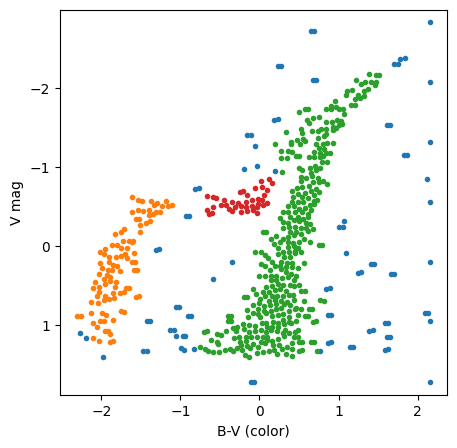

In [31]:
#Ho scelto come hyperparameter epsilon=0.2, per cui mi aspetto di avere
#3 clusters! Scelta arbitraria, ma sapevo da domain conditions che i cluster
#dovevano essere 3, e scelgo come numero minimo di samples 10;


#plotto tutto

ax = pl.figure(figsize=(5,5)).add_subplot(111)
modeldbs = cluster.DBSCAN(eps=0.2, min_samples=10).fit(cmag_scaled)
for i in  np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis();